In [1]:
import tarfile
import os
from math import *
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

### Extraction

In [2]:
xsec_path = '~/PYTHIA/pythia8312/examples/pythia8311_c8wpythia8312'

Files from Felix Riehn for hadronic interaction model datasets: Sibyll 2.3d, EPOS-LHC, QGSJet-II.04 and Pythia 8.3.12 via Corsika 8.

In [3]:
xs_pp_pO_c8pythia8312 = loadtxt('/home/gaudu/PYTHIA/pythia8312/examples/pythia8311_c8wpythia8312/cross-sections-pythia8.txt', skiprows=2)
xs_pp_pO_c8epos = loadtxt('/home/gaudu/PYTHIA/pythia8312/examples/pythia8311_c8wpythia8312/cross-sections-epos.txt', skiprows=2)
xs_pp_pO_c8sibyll = loadtxt('/home/gaudu/PYTHIA/pythia8312/examples/pythia8311_c8wpythia8312/cross-sections-sibyll.txt', skiprows=2)
xs_pp_pO_c8qgsjet = loadtxt('/home/gaudu/PYTHIA/pythia8312/examples/pythia8311_c8wpythia8312/cross-sections-qgsjet.txt', skiprows=2)

Exported datasets from Pythia 8.3.11 from jupyter notebook `pythi8311/pythia8311_xsec_plotting.ipynb` which are the cross-section tables used in Corsika 8 under the version Pythia 8.3.12 since no difference between the versions 8.3.11 and 8.3.12 were noticed in terms of physics:

In [4]:
xs_p_p_py8311 = [31.489, 34.421, 39.814, 46.915, 55.620, 66.101, 78.671, 93.745, 111.833, 133.556, 159.661]
xs_p_p_py8311_err = [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.002]
xs_p_O_py8311 = [311.330, 342.175, 380.661, 422.697, 467.155, 515.759, 570.786, 634.530, 692.921, 778.915, 863.308]
xs_p_O_py8311_err = [0.104, 0.187, 0.302, 0.341, 0.360, 0.298, 0.259, 0.252, 0.229, 0.241, 0.239]
elab_py8311 = [1e+11, 1e+12, 1e+13, 1e+14, 1e+15, 1e+16, 1e+17, 1e+18, 1e+19, 1e+20, 1e+21]

### Plotting

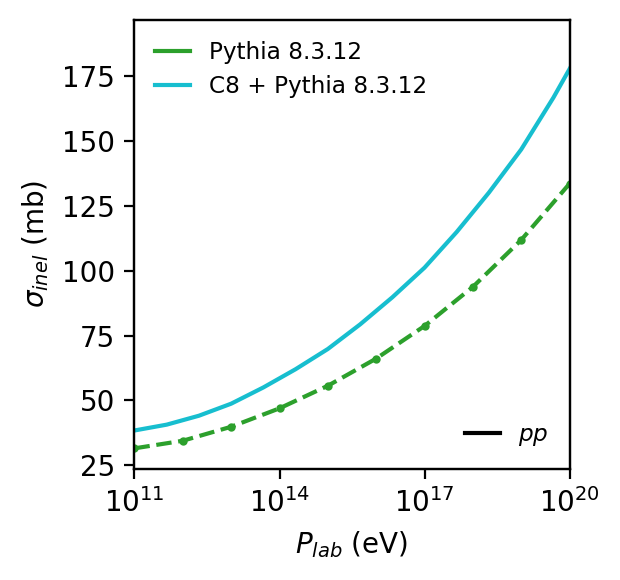

In [5]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.errorbar(elab_py8311, xs_p_p_py8311, yerr=xs_p_p_py8311_err, c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], "-", color="tab:green", label="Pythia 8.3.12")
ax.plot(xs_pp_pO_c8pythia8312[:,1]*1e9, xs_pp_pO_c8pythia8312[:,3], "-", color="tab:cyan", label="C8 + Pythia 8.3.12")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label="$pp$")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pp.png", dpi=400)

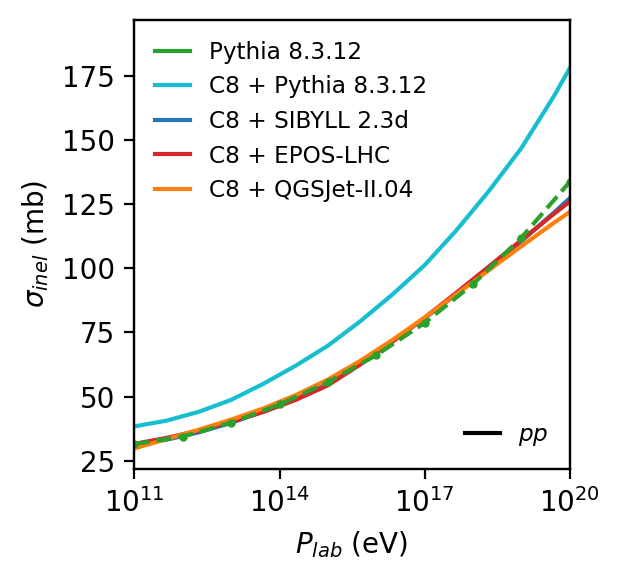

In [6]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.errorbar(elab_py8311, xs_p_p_py8311, yerr=xs_p_p_py8311_err, c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], "-", color="tab:green", label="Pythia 8.3.12")
ax.plot(xs_pp_pO_c8pythia8312[:,1]*1e9, xs_pp_pO_c8pythia8312[:,3], "-", color="tab:cyan", label="C8 + Pythia 8.3.12")
ax.plot(xs_pp_pO_c8sibyll[:,1]*1e9, xs_pp_pO_c8sibyll[:,3], "-", color="tab:blue", label="C8 + SIBYLL 2.3d")
ax.plot(xs_pp_pO_c8epos[:,1]*1e9, xs_pp_pO_c8epos[:,3], "-", color="tab:red", label="C8 + EPOS-LHC")
ax.plot(xs_pp_pO_c8qgsjet[:,1]*1e9, xs_pp_pO_c8qgsjet[:,3], "-", color="tab:orange", label="C8 + QGSJet-II.04")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label="$pp$")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pp.png", dpi=400)

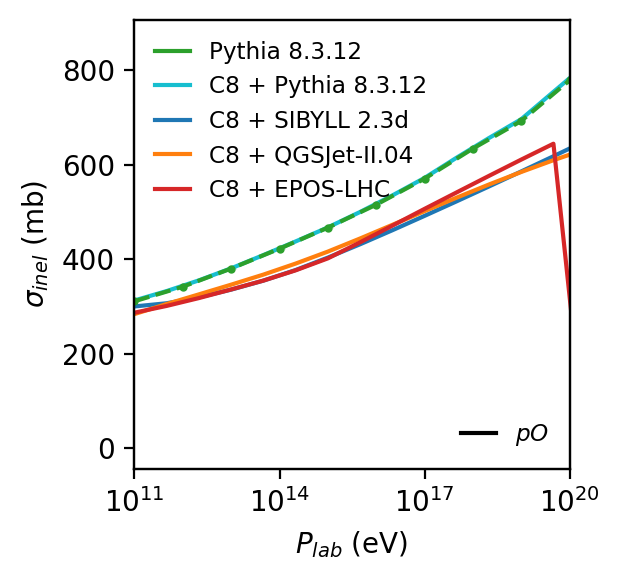

In [7]:
fig, ax = plt.subplots(figsize=(3.2,3), dpi=200)
ax.set(xlim=(1e11,1e20))
ax.set_xscale('log')
ax.set(xlabel=r"$P_{lab}$ (eV)", ylabel=r"$\sigma_{inel}$ (mb)")

ax.errorbar(elab_py8311, xs_p_O_py8311, yerr=xs_p_O_py8311_err, c='tab:green', fmt='o', ms=2, ecolor='lightgrey', elinewidth=4, ls='--')
ax.plot([None], [None], "-", color="tab:green", label="Pythia 8.3.12")
ax.plot(xs_pp_pO_c8pythia8312[:,1]*1e9, xs_pp_pO_c8pythia8312[:,4], "-", color="tab:cyan", label="C8 + Pythia 8.3.12")
ax.plot(xs_pp_pO_c8sibyll[:,1]*1e9, xs_pp_pO_c8sibyll[:,4], "-", color="tab:blue", label="C8 + SIBYLL 2.3d")
ax.plot(xs_pp_pO_c8qgsjet[:,1]*1e9, xs_pp_pO_c8qgsjet[:,4], "-", color="tab:orange", label="C8 + QGSJet-II.04")
ax.plot(xs_pp_pO_c8epos[:,1]*1e9, xs_pp_pO_c8epos[:,4], "-", color="tab:red", label="C8 + EPOS-LHC")
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize="small", frameon=False, handlelength=1.5)

ax2 = ax.twinx()
ax2.get_yaxis().set_visible(False)
ax2.plot([None], [None], "-", color="black", label="$pO$")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0), fontsize="small", frameon=False, handlelength=1.5)

fig.tight_layout()
fig.savefig("xs_inel_pO.png", dpi=400)